# Music Classification 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import sklearn

In [10]:
audio_path = '/home/arman/Documents/Goalearn/1_music_classification/archive/Data/genres_original/blues/blues.00000.wav'
sig , sample_rate = librosa.load('./archive/Data/genres_original/blues/blues.00000.wav')
# sig
mfccs = librosa.feature.mfcc(y=sig, n_mfcc=20, sr=sample_rate)
mfccs.shape

(20, 1293)

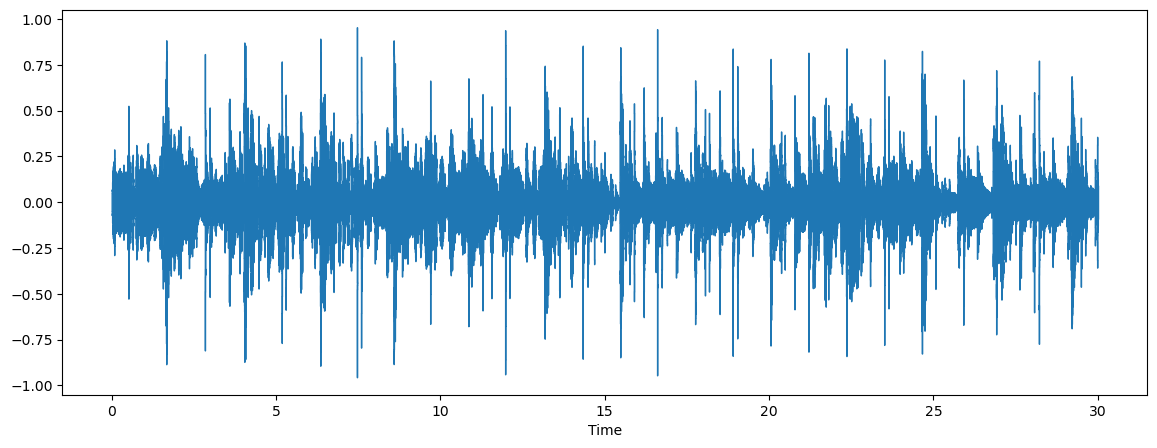

In [11]:

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)


In [12]:
ipd.Audio(filename=audio_path,rate=44100,autoplay=True)


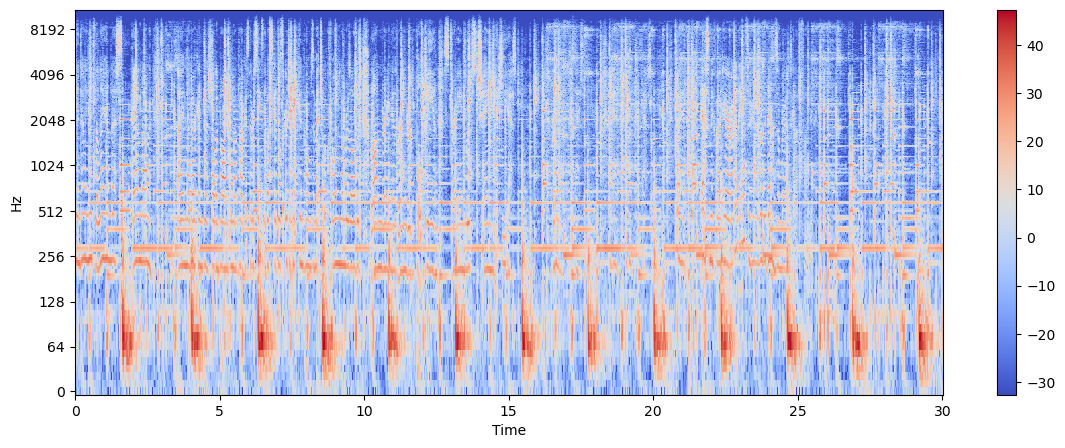

In [13]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

### computing features and creating the data

In [94]:
import os
i=1

df = pd.DataFrame()
music_path ='/home/arman/Documents/Goalearn/1_music_classification/archive/Data/genres_original/'
for dirpath, dnames, fnames in os.walk(music_path):

#     for f in fnames:
#     print( fnames,sep='\n**\n')

    if(dirpath.endswith(('rock','metal'))):
        target = 0 if dirpath.endswith('rock')  else 1;
        for fname in fnames:
            x , sr = librosa.load(os.path.join(dirpath,fname))
            mfccs = librosa.feature.mfcc(y=x, n_mfcc=20, sr=sample_rate)

            data={
                'index':i,
                'song':fname,
                'spectral_centroid_mean':np.mean(librosa.feature.spectral_centroid(y=x, sr=sr)),
                    'spectral_centroid_var':np.var(librosa.feature.spectral_centroid(y=x, sr=sr)),
                    'spectral_bandwidth_mean':np.mean(librosa.feature.spectral_bandwidth(y=x, sr=sr)),
                    'spectral_bandwidth_var':np.var(librosa.feature.spectral_bandwidth(y=x, sr=sr)),
                    'spectral_contrast_mean':np.mean(librosa.feature.spectral_contrast(y=x, sr=sr)),
                    'spectral_contrast_var':np.var(librosa.feature.spectral_contrast(y=x, sr=sr)),
                    'spectral_flatness__mean':np.mean(librosa.feature.spectral_flatness(y=x)),
                    'spectral_flatness__var':np.var(librosa.feature.spectral_flatness(y=x)),
                    'spectral_rolloff__mean':np.mean(librosa.feature.spectral_rolloff(y=x, sr=sr)),
                    'spectral_rolloff__var':np.var(librosa.feature.spectral_rolloff(y=x, sr=sr)),
                    'poly_features_mean':np.mean(librosa.feature.poly_features(y=x, sr=sr)),
                    'poly_features_var':np.var(librosa.feature.poly_features(y=x, sr=sr)),
                    'tonnetz_mean':np.mean(librosa.feature.tonnetz(y=x, sr=sr)),
                    'tonnetz_var':np.var(librosa.feature.tonnetz(y=x, sr=sr)),
                    'zero_crossing_rate_mean':np.mean(librosa.feature.zero_crossing_rate(y=x, )),
                    'zero_crossing_rate_var':np.var(librosa.feature.zero_crossing_rate(y=x,)),
                    'chroma_stft_mean':np.mean(librosa.feature.chroma_stft(y=x, sr=sr)),
                    'chroma_stft_var':np.var(librosa.feature.chroma_stft(y=x, sr=sr)),
                    'chroma_cens_mean':np.mean(librosa.feature.chroma_cens(y=x, sr=sr)),
                    'chroma_cens_var':np.var(librosa.feature.chroma_cens(y=x, sr=sr)),
                    'harmonic_mean':np.mean(librosa.effects.harmonic(y=x)[0]),
                    'harmonic_var':np.var(librosa.effects.harmonic(y=x)[0]),
                    'rms_mean':np.mean(librosa.feature.rms(y=x, )),
                    'rms_var':np.var(librosa.feature.rms(y=x,)),
                    'tempogram_mean':np.mean(librosa.feature.tempogram(y=x, sr=sr)),
                    'tempogram_var':np.var(librosa.feature.tempogram(y=x, sr=sr)),
                    'percussive_mean':np.mean(librosa.effects.harmonic(y=x)[1]),
#                     'chroma_cqt_mean':np.mean(librosa.feature.chroma_cqt(y=x, sr=sr)),
#                     'chroma_cqt_var':np.var(librosa.feature.chroma_cqt(y=x, sr=sr)),
#                     'chroma_cqt_mean':np.mean(librosa.feature.chroma_cqt(y=x, sr=sr)),
#                     'chroma_cqt_var':np.var(librosa.feature.chroma_cqt(y=x, sr=sr)),
#                     'chroma_cqt_mean':np.mean(librosa.feature.chroma_cqt(y=x, sr=sr)),
#                     'chroma_cqt_var':np.var(librosa.feature.chroma_cqt(y=x, sr=sr)),                      
                      }
            for i,mf in enumerate(mfccs):
                data[f'mfcc{i+1}_mean']=np.mean(mf)
                data[f'mfcc{i+1}_var']=np.var(mf)
            data['target'] = target

            new_df = pd.DataFrame(data=data,index=['index'])
            df=pd.concat([df,new_df])
            i+=1
print("DONE!")


DONE!


In [95]:
df.to_csv('./rock_metal_features.csv', sep='\t', encoding='utf-8')


In [162]:
df=pd.read_csv('./rock_metal_features.csv',sep='\t')
# df = pd.read_csv('data.csv', index_col=0)
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# df=df.drop(columns=['0'])
# print(df)
df

,song,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_contrast_mean,spectral_contrast_var,spectral_flatness__mean,spectral_flatness__var,spectral_rolloff__mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,target
0,rock.00015.wav,2335.519931,1.047257e+06,2098.886433,186228.275885,21.177808,71.180976,0.011207,0.000205,4500.064745,...,64.283356,-8.140871,77.154370,-5.716979,62.045920,-3.350068,47.338276,-0.413566,67.251274,0
1,rock.00043.wav,2739.501165,4.086430e+05,2541.944054,168155.651802,17.492183,24.170977,0.057566,0.003412,5326.736571,...,39.987522,-5.528636,52.814070,-2.527791,55.653250,0.621449,45.646510,-1.402993,54.191658,0
2,rock.00012.wav,1863.764472,8.125101e+05,2067.372180,208396.972829,20.479064,61.282575,0.005664,0.000083,3986.232225,...,52.276466,-9.628988,57.548325,-7.385819,55.118100,-9.435307,38.829110,-3.133871,46.775032,0
3,rock.00014.wav,1937.002368,9.186018e+05,2008.283665,183812.979075,20.277096,55.644334,0.006873,0.000127,3985.824210,...,61.840923,-5.408959,60.290700,-3.248392,43.171024,-3.874889,74.630420,-1.037097,56.567530,0
4,rock.00024.wav,2320.395081,1.184992e+05,2044.918364,45874.139376,21.140232,90.076771,0.008181,0.000029,4466.440973,...,38.334910,-9.139816,29.729967,1.592102,29.976326,-4.125119,31.207390,0.308766,35.249847,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,metal.00036.wav,2685.678093,1.777177e+05,2317.579770,34559.713786,19.875531,105.847683,0.020452,0.000162,5331.258044,...,41.508488,-7.460728,26.306587,5.422094,33.293130,-4.396084,32.895600,3.044864,32.449078,1
196,metal.00065.wav,2760.046330,2.140481e+05,2242.641756,76983.352390,20.980286,86.071234,0.020054,0.000165,5259.580622,...,35.932460,-11.783129,49.324863,1.661150,37.710890,-10.603471,38.996260,-3.778469,36.187263,1
197,metal.00033.wav,2030.487916,3.235349e+05,1929.862421,87748.021977,20.662738,92.377865,0.007699,0.000371,4224.296524,...,64.010020,-0.343230,72.082690,-7.770620,59.801884,0.990668,52.720345,-4.180941,21.496191,1
198,metal.00055.wav,3108.521764,1.075656e+05,2361.478699,46553.981648,20.293606,106.984562,0.035110,0.001881,5699.254323,...,37.411343,-7.142877,30.024181,4.654262,35.386040,-6.511414,44.347664,7.862762,33.422104,1


In [163]:
df.describe()

,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_contrast_mean,spectral_contrast_var,spectral_flatness__mean,spectral_flatness__var,spectral_rolloff__mean,spectral_rolloff__var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,target
count,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2422.476745,3.199076e+05,2252.716471,102705.561017,20.371610,75.480414,0.019229,0.000655,4897.298317,1.289950e+06,...,42.101094,-7.123106,44.346647,1.590899,44.978696,-4.323306,44.121301,-0.161239,42.047824,0.500000
std,465.270430,2.516803e+05,283.630205,92748.877958,1.549384,30.651192,0.018212,0.001166,875.306770,1.183684e+06,...,15.398796,3.540642,22.123339,3.453180,22.322817,3.494511,20.469368,3.663810,20.078993,0.501255
min,1181.326607,4.375263e+04,1568.952472,11146.734295,15.726483,10.217592,0.001295,0.000002,2367.345030,1.019584e+05,...,17.181950,-15.060139,17.213970,-7.839728,15.401896,-16.089869,18.558168,-9.290357,16.508140,0.000000
25%,2146.695740,1.587026e+05,2098.842621,50564.137706,19.597689,62.344825,0.007689,0.000064,4449.077434,6.345778e+05,...,32.111718,-9.508603,30.599457,-1.012055,31.540510,-6.504121,30.754965,-2.750216,30.201986,0.000000
50%,2459.520892,2.535107e+05,2229.707143,76642.753299,20.485078,83.672482,0.013297,0.000144,4983.050495,9.721065e+05,...,37.942109,-7.230934,39.586886,1.693639,39.203216,-4.331604,39.171871,-0.253871,36.308088,0.500000
75%,2743.180479,3.953210e+05,2378.831888,119178.634906,21.273822,97.442246,0.022058,0.000686,5403.562060,1.551120e+06,...,49.590384,-5.112629,50.228516,4.257204,50.785815,-2.320510,52.775516,2.436325,49.815672,1.000000
max,3488.501991,1.757258e+06,3241.578308,694624.872941,24.347189,130.080718,0.117468,0.007361,7659.958219,8.308336e+06,...,130.295060,3.713944,199.191160,9.797574,172.216500,4.238797,180.281800,9.081654,148.711410,1.000000


### Scatter 5  features 

In [122]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x)


hi


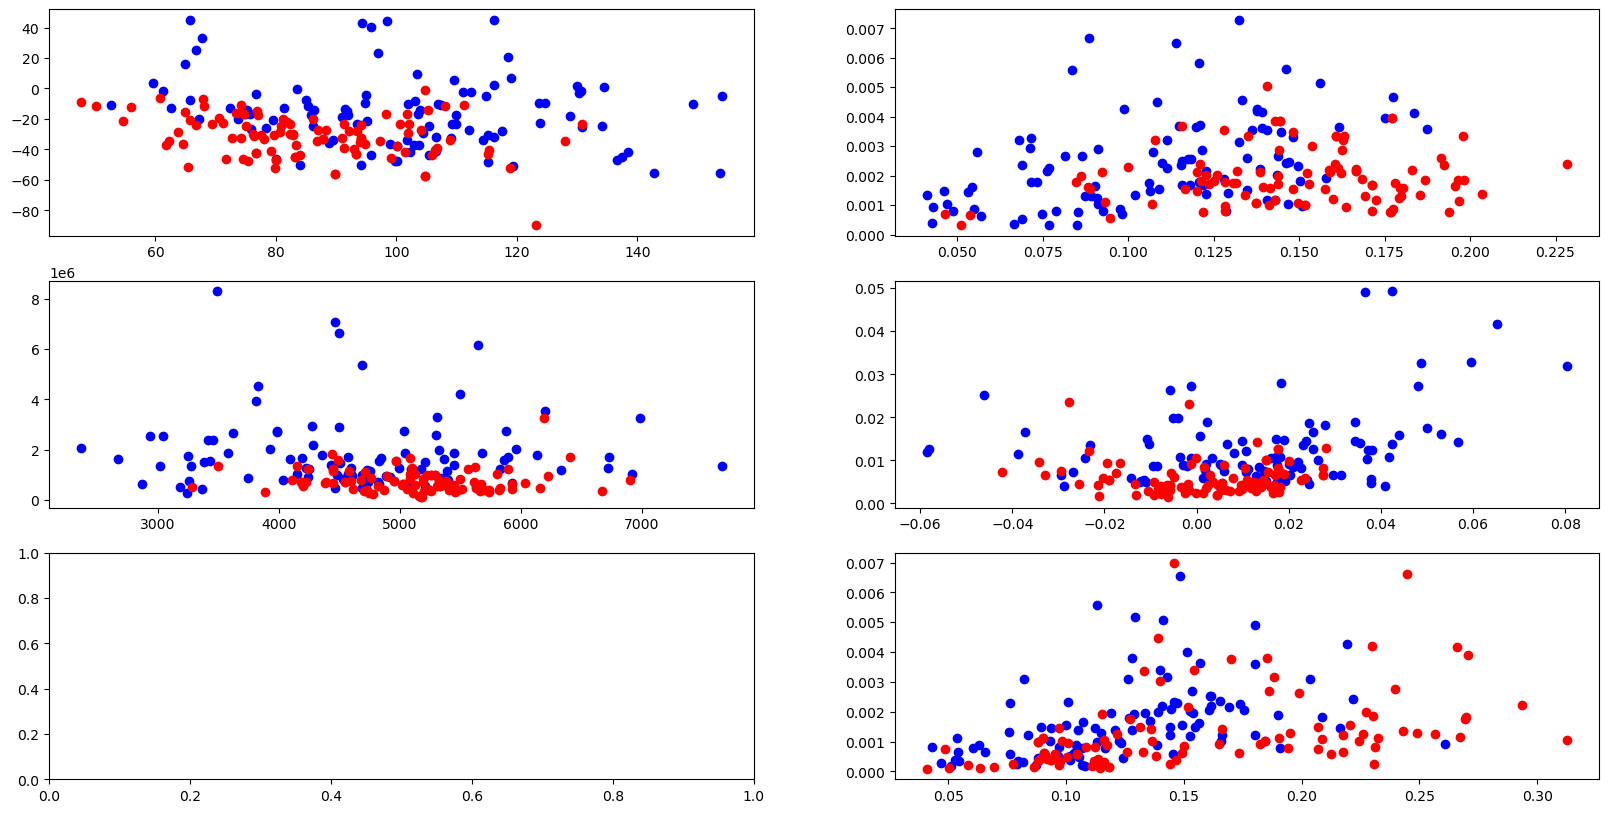

In [217]:
rock=df[df.target==0]
metal=df[df.target==1]
rock.shape

# rock
# fig, ax = plt.subplots(2, 2)
print('hi')

fig, ax = plt.subplots(3, 2)
fig.set_figwidth(20)
fig.set_figheight(10)
ax[0, 0].scatter(rock.mfcc2_mean, rock.mfcc3_mean,  color='blue') #row=0, col=0
ax[0, 0].scatter(metal.mfcc2_mean, metal.mfcc3_mean,  color='red') #row=0, col=0

ax[0, 1].scatter(rock.zero_crossing_rate_mean, rock.zero_crossing_rate_var,  color='blue') #row=0, col=0
ax[0, 1].scatter(metal.zero_crossing_rate_mean, metal.zero_crossing_rate_var,  color='red') #row=0, col=0

ax[1, 0].scatter(rock.spectral_rolloff__mean,rock.spectral_rolloff__var,  color='blue') #row=0, col=0
ax[1, 0].scatter(metal.spectral_rolloff__mean,metal.spectral_rolloff__var,  color='red') #row=0, col=0

ax[1, 1].scatter(rock.tonnetz_mean, (rock.tonnetz_var),  color='blue') #row=0, col=0
ax[1, 1].scatter(metal.tonnetz_mean,(metal.tonnetz_var),  color='red') #row=0, col=0

ax[2, 1].scatter(rock.rms_mean, (rock.rms_var),  color='blue') #row=0, col=0
ax[2, 1].scatter(metal.rms_mean,(metal.rms_var),  color='red') #row=0, col=0

# ax[0, 0].scatter(metal.mfcc1_mean, metal.target,  color='red') #row=0, col=0
# print('hi')

# ax[1, 0].scatter(df.tscore, df.sal,  color='blue') #row=1, col=0
# ax[0, 1].scatter(df.iscore, df.sal,  color='blue')#row=0, col=1
plt.show()
# metal.mfcc1_mean
# type(metal.mfcc1_mean)


In [164]:
# mfccs = librosa.feature.mfcc(y=sig, n_mfcc=20, sr=sample_rate)
# delta=librosa.feature.delta(mfccs)
# print(delta[0])
# np.var(mfccs[1])
sdf=df.loc[:, ~df.columns.isin(['tempogram_mean','tempogram_var','harmonic_var'])]


'0     0\n1     0\n2     0\n3     0\n4     0\n5     0\n6     0\n7     0\n8     0\n9     0\n10    0\n11    0\n12    0\n13    0\n14    0\n15    0\n16    0\n17    0\n18    0\n19    0\n20    0\n21    0\n22    0\n23    0\n24    0\n25    0\n26    0\n27    0\n28    0\n29    0\n30    0\n31    0\n32    0\n33    0\n34    0\n35    0\n36    0\n37    0\n38    0\n39    0\n40    0\n41    0\n42    0\n43    0\n44    0\n45    0\n46    0\n47    0\n48    0\n49    0\n50    0\n51    0\n52    0\n53    0\n54    0\n55    0\n56    0\n57    0\n58    0\n59    0\n60    0\n61    0\n62    0\n63    0\n64    0\n65    0\n66    0\n67    0\n68    0\n69    0\n70    0\n71    0\n72    0\n73    0\n74    0\n75    0\n76    0\n77    0\n78    0\n79    0\n80    0\n81    0\n82    0\n83    0\n84    0\n85    0\n86    0\n87    0\n88    0\n89    0\n90    0\n91    0\n92    0\n93    0\n94    0\n95    0\n96    0\n97    0\n98    0\n99    0'

### Normalize data

In [198]:
from sklearn import preprocessing
data=df.loc[:, ~df.columns.isin(['target', 'song'])]

X = preprocessing.StandardScaler().fit(data).transform(data.astype(float))
# ff=pd.DataFrame(data)
# ff

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,-0.187364,2.897224,-0.543722,0.902785,0.521640,-0.140622,-0.441563,-0.386156,-0.454961,1.371372,...,-0.582429,1.444134,-0.288173,1.486668,-2.121586,0.766483,0.279204,0.157555,-0.069043,1.258365
1,0.683087,0.353456,1.022294,0.707441,-1.863096,-1.678179,2.110320,2.370829,0.491846,0.589731,...,-1.128662,-0.137600,0.451464,0.383698,-1.195717,0.479390,1.418557,0.074699,-0.339775,0.606321
2,-1.203847,1.962167,-0.655111,1.142403,0.069527,-0.464369,-0.746690,-0.490890,-1.043465,1.221316,...,-0.980950,0.662448,-0.709524,0.598228,-2.606075,0.455357,-1.466537,-0.259191,-0.813386,0.236021
3,-1.046042,2.384758,-0.863964,0.876679,-0.061154,-0.648779,-0.680116,-0.453560,-1.043933,1.185397,...,-0.358653,1.285124,0.485349,0.722498,-1.404918,-0.081182,0.128642,1.494217,-0.239657,0.724944
4,-0.219953,-0.802263,-0.734476,-0.614283,0.497327,0.477403,-0.608161,-0.537359,-0.493471,-0.683542,...,-0.683634,-0.245190,-0.571018,-0.662348,0.000349,-0.673751,0.056856,-0.632473,0.128605,-0.339411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.567115,-0.566380,0.229264,-0.736579,-0.320981,0.993223,0.067310,-0.423595,0.497024,-0.631650,...,1.220583,-0.038581,-0.095595,-0.817477,1.112253,-0.524794,-0.020879,-0.549791,0.877269,-0.479249
196,0.727355,-0.421667,-0.035610,-0.278028,0.393836,0.346394,0.045445,-0.421041,0.414930,-0.269194,...,0.425451,-0.401597,-1.319455,0.225586,0.020395,-0.326394,-1.801661,-0.251004,-0.989764,-0.292608
197,-0.844611,0.014448,-1.141149,-0.161674,0.188371,0.552665,-0.634658,-0.243789,-0.770805,-0.508693,...,-1.192632,1.426339,1.919677,1.256847,-2.717788,0.665704,1.524479,0.421147,-1.099890,-1.026108
198,1.478208,-0.845815,0.384427,-0.606934,-0.050471,1.030407,0.874181,1.054312,0.918499,-0.750414,...,1.512437,-0.305317,-0.005598,-0.649016,0.889340,-0.430803,-0.627727,0.011086,2.195566,-0.430667


### Test and Train

In [199]:
from sklearn.model_selection import train_test_split
# X=df.loc[:, ~df.columns.isin(['target', 'song'])]
y=df.target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (160, 67) (160,)
Test set: (40, 67) (40,)


### Training

Let's start the algorithm with k=4 for now:


In [213]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=1)

### Predicting

We can use the model to make predictions on the test set:


In [214]:
yhat = neigh.predict(X_test)
yhat

/home/arman/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

### Accuracy evaluation

<!-- In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.
 -->

In [215]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.7


/home/arman/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
